### Import Libraries and Data

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer

# set the theme for seaborn
sns.set(style="whitegrid")

In [3]:
# Import data
data = pd.read_csv('stroke_data.csv')

### Pre- Exploratory Data Analysis 

In [4]:
data.shape

(40930, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40930 entries, 0 to 40929
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40927 non-null  float64
 1   age                40930 non-null  int64  
 2   hypertension       40930 non-null  int64  
 3   heart_disease      40930 non-null  int64  
 4   ever_married       40930 non-null  int64  
 5   work_type          40930 non-null  int64  
 6   Residence_type     40930 non-null  int64  
 7   avg_glucose_level  40930 non-null  float64
 8   bmi                40925 non-null  float64
 9   smoking_status     40930 non-null  int64  
 10  stroke             40930 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.4 MB


In [6]:
data.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85,0,0,1,4,1,186.21,29.0,1,1


In [7]:
data.tail()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
40925,1.0,38,0,0,0,4,1,120.94,29.7,1,0
40926,0.0,53,0,0,1,4,0,77.66,40.8,0,0
40927,1.0,32,0,0,1,2,0,231.95,33.2,0,0
40928,1.0,42,0,0,1,3,0,216.38,34.5,0,0
40929,1.0,35,0,0,0,4,0,95.01,28.0,0,0


In [8]:
data.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40927.000000,40930.000000,40930.000000,40930.000000,40930.000000,40930.000000,40930.000000,40930.000000,40925.000000,40930.000000,40930.000000
mean,0.555159,51.322184,0.214488,0.128414,0.821305,3.460811,0.514903,122.023751,30.399709,0.488712,0.500122
std,0.496954,21.622681,0.410472,0.334555,0.383102,0.781228,0.499784,57.485132,6.828320,0.499879,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.410000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [9]:
# Check null value
data.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  5
smoking_status       0
stroke               0
dtype: int64

In [10]:
# Check unique value
data.nunique()

sex                     2
age                   111
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    2958
bmi                   370
smoking_status          2
stroke                  2
dtype: int64

In [11]:
# Check duplicated rows
data.duplicated().sum()

0

In [12]:
# Convert the numerical value for better data understanding
# Create a copy of data that store the converted categorical value
data_copy = data.copy()

# Create dictionaries for value mapping
sex_mapping = {0: 'Female', 1: 'Male'}
ever_married_mapping = {0: 'Not married', 1: 'Married'}
work_type_mapping = {0: 'Never worked', 1: 'Children', 2: 'Goverment job', 3: 'Self-employed', 4: 'Private job'}
residence_type_mapping = {0: 'Rural', 1: 'Urban'}
smoking_status_mapping = {0: 'Never smoked', 1: 'Smoked'}

# Perform mapping
data_copy['sex'] = data_copy['sex'].map(sex_mapping)
data_copy['ever_married'] = data_copy['ever_married'].map(ever_married_mapping)
data_copy['work_type'] = data_copy['work_type'].map(work_type_mapping)
data_copy['Residence_type'] = data_copy['Residence_type'].map(residence_type_mapping)
data_copy['smoking_status'] = data_copy['smoking_status'].map(smoking_status_mapping)

In [13]:
# Find unique value in each columns
for column in data_copy.columns:
  unique_values = data_copy[column].unique()
  print(f"Unique values in column {column}: {unique_values}\n")

Unique values in column sex: ['Male' 'Female' nan]

Unique values in column age: [ 63  42  61  41  85  55  82  17  31  39  26  19  78  45  50  53  71  64
  75  67  40  23  33  65  83  79  62  58  34  27  68  52  49  13  60  72
  24  11  47  70  38  59  36  77  54  93  29  51  21  56  20  46  37  18
  66  25  57  16  80  28  84  44  43  76  48   8  14  88  69  22  15  32
  35  73  81  74  30  86  92   5  91   6  87   7   9  12  10  89  90   4
   1   3  -2  -5  -4  -3  -1   2   0  -6  -9  95 103  94  98  96 102 101
  97  99 100]

Unique values in column hypertension: [0 1]

Unique values in column heart_disease: [1 0]

Unique values in column ever_married: ['Married' 'Not married']

Unique values in column work_type: ['Private job' 'Self-employed' 'Goverment job' 'Children' 'Never worked']

Unique values in column Residence_type: ['Urban' 'Rural']

Unique values in column avg_glucose_level: [228.69 105.92 171.23 ... 161.6  133.71 146.59]

Unique values in column bmi: [36.6 32.5 34.4 24. 

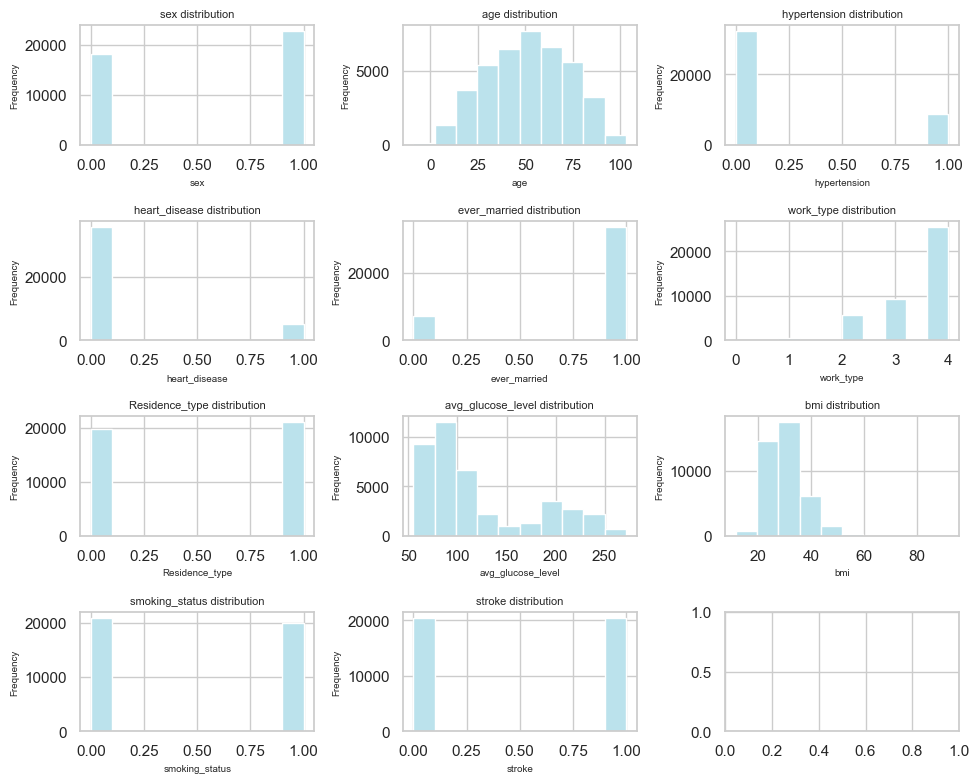

In [14]:
# Craete histogram to have an overview of the distribution for each attributes
# Initialize the chart layouts
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 8))
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(data.columns):   
    # Create histogram
    data[column].hist(ax=axes[i], 
                    edgecolor='white', 
                    color='#BBE2EC'
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column, fontsize=7) 
    axes[i].set_ylabel('Frequency', fontsize=7) 
    axes[i].set_title(f'{column} distribution', fontsize=8)

# Plot the histograms
plt.tight_layout()
plt.show()

In [15]:
 # Function to alculate summary statistics
def calculate_stat(data, column_name):
    median = data[column_name].median()
    upper_quartile = data[column_name].quantile(0.75)
    lower_quartile = data[column_name].quantile(0.25)
    iqr = upper_quartile - lower_quartile
    upper_whisker = data[column_name][data[column_name] <= upper_quartile + 1.5 * iqr].max()
    lower_whisker = data[column_name][data[column_name] >= lower_quartile - 1.5 * iqr].min()

    # Print statistics
    print(f"Median: {median:.2f}")
    print(f"Q3 (75th percentile): {upper_quartile:.2f}")
    print(f"Q1 (25th percentile): {lower_quartile:.2f}")
    print(f"Interquartile Range (IQR): {iqr:.2f}")
    print(f"Upper Whisker: {upper_whisker:.2f}")
    print(f"Lower Whisker: {lower_whisker:.2f}")

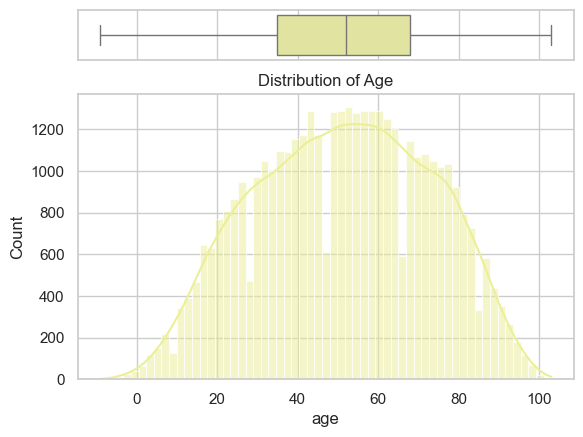

Median: 52.00
Q3 (75th percentile): 68.00
Q1 (25th percentile): 35.00
Interquartile Range (IQR): 33.00
Upper Whisker: 103.00
Lower Whisker: -9.00


In [16]:
# Create a histogram and boxplot to have a more precise view of the distribution for age
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
sns.boxplot(data["age"], orient="h", ax=ax_box, color='#EBEF95')
sns.histplot(data=data, x="age", ax=ax_hist, color='#EBEF95', kde=True)

ax_hist.set_title('Distribution of Age')
ax_box.set(xlabel='')
plt.show()

calculate_stat(data, "age")

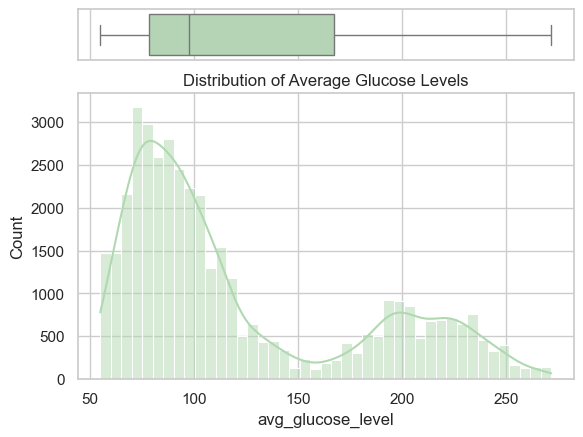

Median: 97.92
Q3 (75th percentile): 167.41
Q1 (25th percentile): 78.75
Interquartile Range (IQR): 88.66
Upper Whisker: 271.74
Lower Whisker: 55.12


In [17]:
# Create a histogram and boxplot to have a more precise view of the distribution for average glucose level
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
sns.boxplot(data["avg_glucose_level"], orient="h", ax=ax_box, color='#B0D9B1')
sns.histplot(data=data, x="avg_glucose_level", ax=ax_hist, color='#B0D9B1', kde=True)

ax_hist.set_title('Distribution of Average Glucose Levels')
ax_box.set(xlabel='')
plt.show()

calculate_stat(data, "avg_glucose_level")

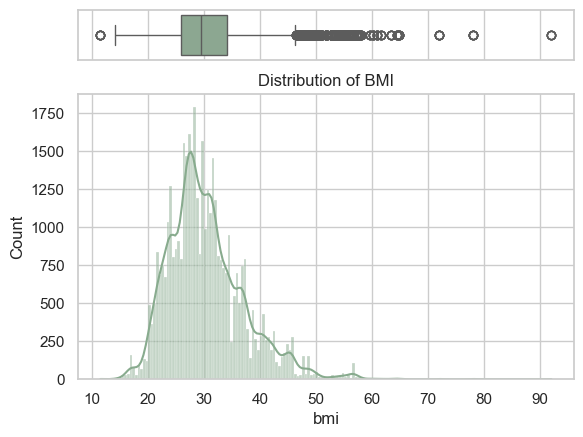

Median: 29.40
Q3 (75th percentile): 34.10
Q1 (25th percentile): 25.90
Interquartile Range (IQR): 8.20
Upper Whisker: 46.30
Lower Whisker: 14.10


In [18]:
# Create a histogram and boxplot to have a more precise view of the distribution for BMI
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
sns.boxplot(data["bmi"], orient="h", ax=ax_box, color='#88AB8E')
sns.histplot(data=data, x="bmi", ax=ax_hist, color='#88AB8E', kde=True)

ax_hist.set_title('Distribution of BMI')
ax_box.set(xlabel='')
plt.show()

calculate_stat(data, "bmi")

In [19]:
# Check the skewness of continuous data
data_skew = data[['age','avg_glucose_level','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['Skewness']
skew['Status'] = skew['Skewness'] > 0.6
skew

,Skewness,Status
age,-0.078221,False
avg_glucose_level,0.945414,True
bmi,1.075823,True


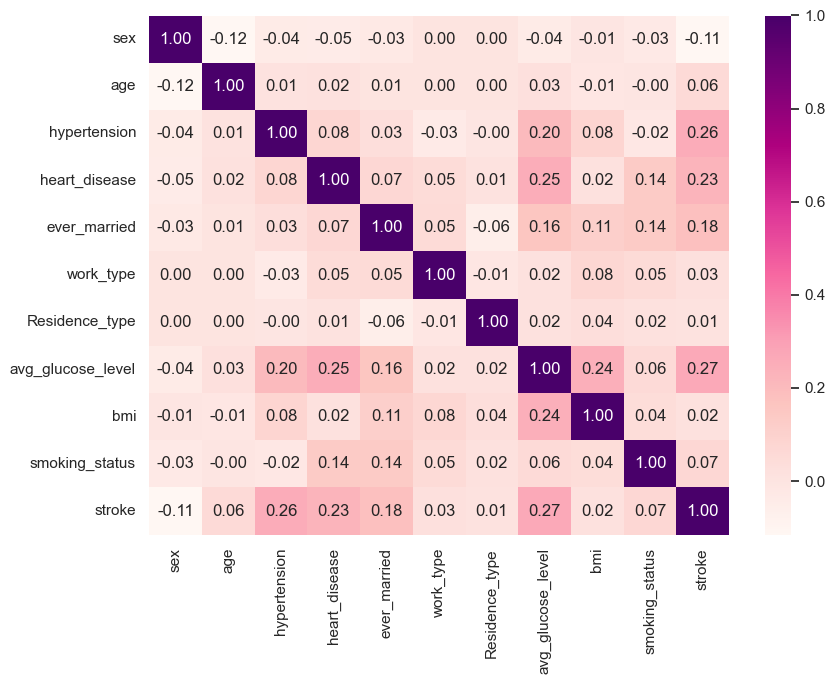

In [20]:
# Correlation heatmap - Find the correlation between features
corr = data.corr()
plt.figure(figsize=(9, 7))

sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdPu", cbar=True)

plt.tight_layout()
plt.show()

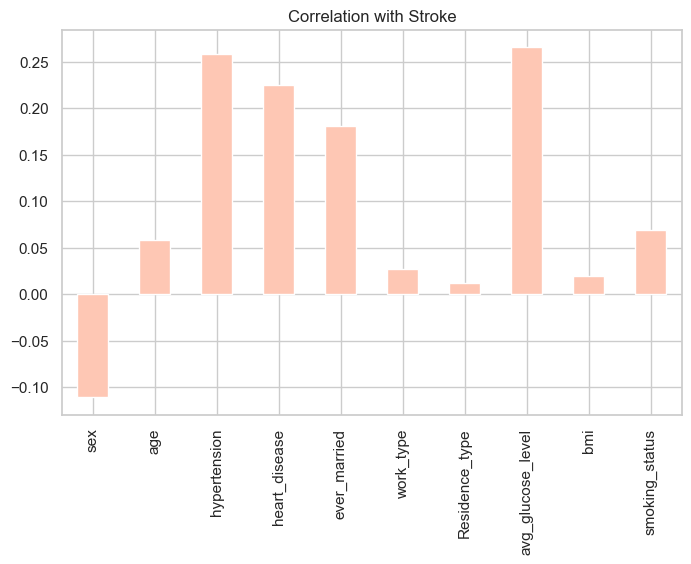

In [21]:
data.drop('stroke', axis=1).corrwith(data.stroke).plot(kind='bar', grid=True, figsize=(8, 5), 
          title="Correlation with Stroke",color='#FEC7B4');

In [22]:
# Create barcharts to have an overview of the distribution for categorical value (Before preprocessing)
selected_columns = ['sex', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Create a new dataframe with just the selected columns (used the data_copy dataframe which converted into categorical value for better viewing)
data1 = data_copy[selected_columns]
data1['sex'] = data1['sex'].fillna('NaN')

for column in data1:
    # Calculate the frequency of each feature
    counts = data1[column].value_counts(dropna=False).reset_index()
    counts.columns = [column, "count"]

    # Create the bar chart
    fig = px.bar(counts, x=column, y='count', title=f'Count of {column}', color='count', color_continuous_scale='Sunset', text='count')
    
    # Show the plot
    fig.show()

C:\Users\tanky\AppData\Local\Temp\ipykernel_20300\612460313.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['sex'] = data1['sex'].fillna('NaN')


In [23]:
# Filter the data
selected_columns = ['age', 'ever_married', 'work_type', 'smoking_status']
data2 = data[selected_columns]

filtered_data = data2[
    (data['smoking_status'] == 1) & 
    (data['work_type'] != 0) & (data['work_type'] != 1) &
    (data['ever_married'] == 1)
]
colors = ["#FF9494", "#EFB495", "#EBEF95"]
title = ["Married", "Worked", "Smoked"]

fig = go.Figure()

for i, column in enumerate(selected_columns[1:]):
    counts = filtered_data.groupby('age')[column].sum().reset_index(name='count')
    
    # Create a new figure for each plot
    fig = go.Figure()
    
    # Create the bar chart
    fig.add_trace(go.Bar(
        x=counts['age'], 
        y=counts['count'], 
        name=title[i],
        marker_color=colors[i],
        opacity=0.7
    ))

    fig.update_layout(
        title=f'Distribution of Age for {title[i]}',
        xaxis_title='Age',
        yaxis_title='Count',
        template='plotly_white'
    )
    
    # Show the plot
    fig.show()

### Data Preprocessing

#### Remove Null Values in Sex(Gender)

In [24]:
# Sum of null values in sex column
sex_null_value = data['sex'].isnull().sum()
print(f"Total null value before: {sex_null_value}\n")

# Remove null sex values in the sex column
data = data.dropna(subset=['sex'])

# Verification of null value after cleaning
sex_null_value = data['sex'].isnull().sum()
print(f"Total null value after: {sex_null_value}\n")

# Calculate the frequency of the sex
counts = data['sex'].value_counts(dropna=False).reset_index()
counts.columns = ['sex', 'count']

# Mapping the x-axis title
sex_mapping = {0: 'Female', 1: 'Male'}
counts['sex'] = counts['sex'].map(sex_mapping)

# Create the bar chart
fig = px.bar(counts, x='sex', y='count', title='Count of sex', color='count',
             color_continuous_scale='Sunset', text='count')

# Show the x-axis title and the plot
fig.update_layout(xaxis_title='Sex')
fig.show()

Total null value before: 3

Total null value after: 0



#### Type Conversion for Sex(Gender)

In [25]:
# Convert the binary column from float to int
data['sex'] = data['sex'].astype('int64')

data.dtypes

sex                    int64
age                    int64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

#### Remove Outliers Age in Age

In [26]:
# Sum of outliers and values that need to remove in age column
count_age = len(data[(data['age'] < 7) | (data['age'] >= 100)])
print(f"Total number before: {count_age}\n")

# Remove age that have negative avlue, <7 & >100
data = data[(data['age'] >= 7) & (data['age'] < 100)]

# Verification on the result after cleaning
print(f"Unique values in column age: {sorted(data['age'].unique())}\n")
count_age = len(data[(data['age'] < 7) | (data['age'] >= 100)])
print(f"Total number after: {count_age}\n")

# Verification using bar chart
# Calculate the frequency of each age
counts = data['age'].value_counts().sort_index().reset_index()
counts.columns = ['age', 'count']

# Create the bar chart
fig = px.bar(counts, x='age', y='count', title='Count of Age', 
             color='count', color_continuous_scale='Sunset', text='count')

# Show the plot
fig.show()

Total number before: 437

Unique values in column age: [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

Total number after: 0



#### Impute Missing Values in BMI

In [27]:
# Shows the data rows with null bmi value
# Sum of null values in bmi column
bmi_null_value = data['bmi'].isnull().sum()
print(f"Total null value before: {bmi_null_value}\n")

# Find the rows with null bmi values
null_bmi_indices = data[data['bmi'].isna()].index

print("Before imputation:")
print(data.loc[null_bmi_indices])

Total null value before: 5

Before imputation:
       sex  age  hypertension  heart_disease  ever_married  work_type  \
2057     0    9             0              1             1          4   
2118     1   63             0              0             0          4   
2307     1   65             0              0             1          4   
27314    1   68             0              0             0          4   
27432    0   85             0              0             0          4   

       Residence_type  avg_glucose_level  bmi  smoking_status  stroke  
2057                1              91.92  NaN               1       1  
2118                0              88.92  NaN               0       1  
2307                0             116.44  NaN               1       1  
27314               1              62.37  NaN               0       0  
27432               0              73.69  NaN               0       0  


In [28]:
# Initialize the imputer with median imputation
median_imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'bmi' column and fir transform the data
data['bmi'] = median_imputer.fit_transform(data[['bmi']])

# Verify the imputation result
bmi_null_value_after = data['bmi'].isnull().sum()
print(f"Total null values after median imputation: {bmi_null_value_after}")

print("\nAfter imputation:")
print(data.loc[null_bmi_indices])

Total null values after median imputation: 0

After imputation:
       sex  age  hypertension  heart_disease  ever_married  work_type  \
2057     0    9             0              1             1          4   
2118     1   63             0              0             0          4   
2307     1   65             0              0             1          4   
27314    1   68             0              0             0          4   
27432    0   85             0              0             0          4   

       Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
2057                1              91.92  29.4               1       1  
2118                0              88.92  29.4               0       1  
2307                0             116.44  29.4               1       1  
27314               1              62.37  29.4               0       0  
27432               0              73.69  29.4               0       0  


#### Handling Dirty Data in age, ever_married, work_type & smoking_status

In [29]:
# Filter data for age 18 and below
data_age_18_below = data[data['age'] < 18]

# Function for creating bar chart
def plot_count(data, column, title, labels, colors):
    
    # Create a count plot for the specified column among individuals below 18
    plt.figure(figsize=(8, 5)) 
    ax = sns.countplot(x=column, data=data, palette=colors)
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    
    # Set custom labels for the x-axis
    plt.xticks(ticks=range(len(labels)), labels=labels)
    
    # Annotate each bar with the count value
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, -10),
        textcoords = 'offset points')

    plt.show()

##### Under 18 - ever_married

C:\Users\tanky\AppData\Local\Temp\ipykernel_20300\1306253318.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




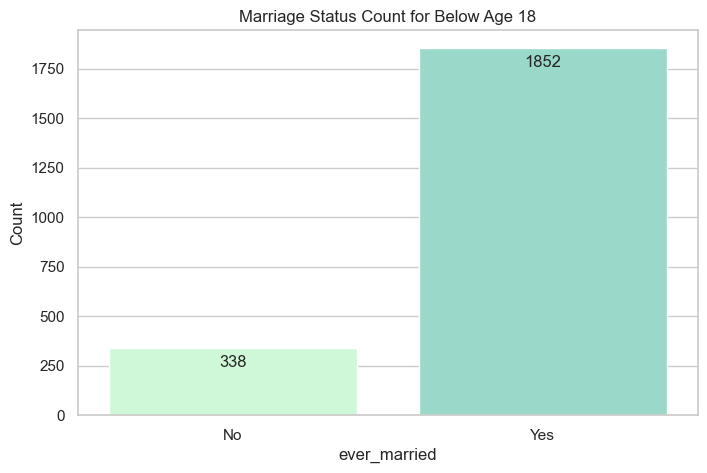

    sex  age  hypertension  heart_disease  ever_married  work_type  \
7     0   17             1              0             1          4   
45    1   13             1              0             1          4   
53    1   11             1              0             1          3   
65    1   17             0              1             1          4   
92    1   13             1              0             1          4   

    Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
7                0              80.43  29.7               0       1  
45               0              74.90  22.2               0       1  
53               0              72.67  28.9               0       1  
65               0              59.35  32.3               1       1  
92               0             209.31  35.8               0       1  


In [30]:
# Before
# Create a count plot for 'ever_married' status among individuals 18 below
plot_count(
    data_age_18_below, 
    column='ever_married', 
    title='Marriage Status Count for Below Age 18', 
    labels=['No', 'Yes'], 
    colors=['#C8FFD4','#8FE3CF']
)

# Filter the data
filtered_rows = data.loc[(data['age'] < 18) & (data['ever_married'] == 1)].head(5)
print(filtered_rows)

Before:
Total married individuals below Age 18: 1852

After:
Total married individuals below Age 18: 0


C:\Users\tanky\AppData\Local\Temp\ipykernel_20300\1306253318.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




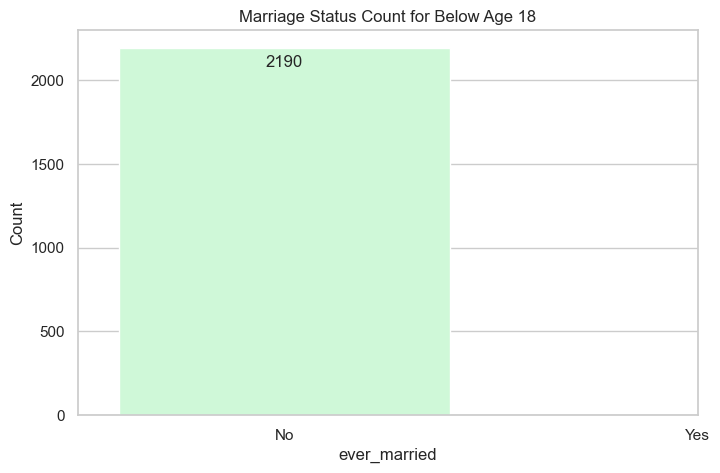

Empty DataFrame
Columns: [sex, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [31]:
# Filtering individuals below 18 who are marked as married
married_under_18 = data[(data['age'] < 18) & (data['ever_married'] == 1)].shape[0]

# Before
print("Before:")
print(f"Total married individuals below Age 18: {married_under_18}\n")

# Set 'ever_married' to 0 (No) where age is less than 18
data.loc[data['age'] < 18, 'ever_married'] = 0

# After 
married_under_18 = data[(data['age'] < 18) & (data['ever_married'] == 1)].shape[0]
print("After:")
print(f"Total married individuals below Age 18: {married_under_18}")

#Justify the result using a bar chart
data_age_18_below = data[data['age'] < 18]
plot_count(
    data_age_18_below, 
    column='ever_married', 
    title='Marriage Status Count for Below Age 18', 
    labels=['No', 'Yes'], 
    colors=['#C8FFD4']
)

# Filter the data
filtered_rows = data.loc[(data['age'] < 18) & (data['ever_married'] == 1)].head(5)
print(filtered_rows)

##### Under 18 - work_type

C:\Users\tanky\AppData\Local\Temp\ipykernel_20300\1306253318.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




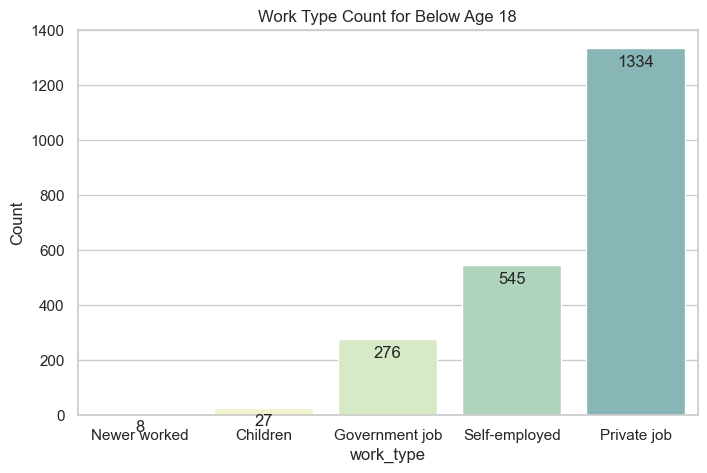

    sex  age  hypertension  heart_disease  ever_married  work_type  \
7     0   17             1              0             0          4   
45    1   13             1              0             0          4   
48    1   17             1              0             0          4   
53    1   11             1              0             0          3   
65    1   17             0              1             0          4   

    Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
7                0              80.43  29.7               0       1  
45               0              74.90  22.2               0       1  
48               1             113.01  24.0               0       1  
53               0              72.67  28.9               0       1  
65               0              59.35  32.3               1       1  


In [32]:
# Before
# Create a count plot for 'work_type' status among individuals 18 below
plot_count(
    data_age_18_below, 
    column='work_type', 
    title='Work Type Count for Below Age 18', 
    labels=['Newer worked', 'Children', 'Government job', 'Self-employed', 'Private job'], 
    colors=['#FAEF9B','#F9F7C9','#D5F0C1','#AAD9BB','#80BCBD',]
)

# Filter the data
filtered_rows = data.loc[(data['age'] < 18) & (data['work_type'] > 1)].head(5)
print(filtered_rows)

Before:
Total working individuals below 18: 2155

After:
Total working individuals below 18: 0
work_type
1    2190
0       0
2       0
3       0
4       0
Name: count, dtype: int64


C:\Users\tanky\AppData\Local\Temp\ipykernel_20300\1306253318.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




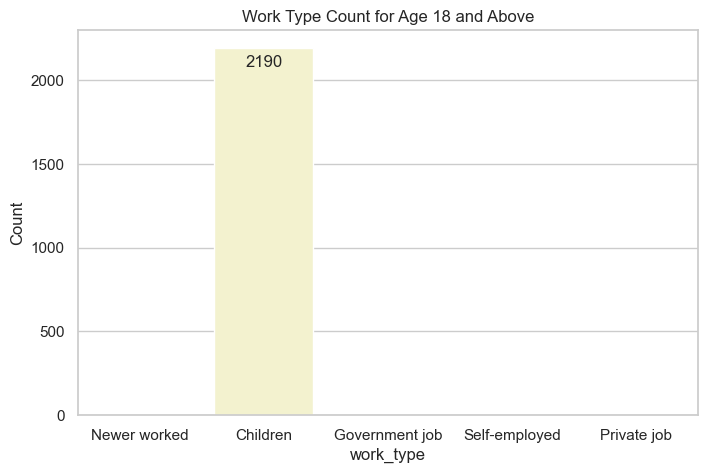

Empty DataFrame
Columns: [sex, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [33]:
# Filtering individuals below 18 who are marked as worked
workers_under_18 = data[(data['age'] < 18) & (data['work_type'].isin([2,3,4]))].shape[0]

# Before
print("Before:")
print(f"Total working individuals below 18: {workers_under_18}\n")

# Set 'work_type' to 1 (children) where age is less than 18
data.loc[data['age'] < 18, 'work_type'] = 1

data['work_type'] = pd.Categorical(data['work_type'], categories=[0, 1, 2, 3, 4])

# After 
workers_under_18 = data[(data['age'] < 18) & (data['work_type'].isin([2,3,4]))].shape[0]
print("After:")
print(f"Total working individuals below 18: {workers_under_18}")

print(data[data['age'] < 18]['work_type'].value_counts())
data_age_18_below = data[data['age'] < 18]

# Justify the result using the chart
plot_count(
    data[data['age'] < 18], 
    column='work_type', 
    title='Work Type Count for Age 18 and Above', 
    labels=['Newer worked', 'Children', 'Government job', 'Self-employed', 'Private job'], 
    colors=['#FAEF9B','#F9F7C9','#D5F0C1','#AAD9BB','#80BCBD',]
)

# Filter the data
filtered_rows = data.loc[(data['age'] < 18) & (data['work_type'].isin([2,3,4]))].head(5)
print(filtered_rows)

##### Under 18 - smoking_status

C:\Users\tanky\AppData\Local\Temp\ipykernel_20300\1306253318.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




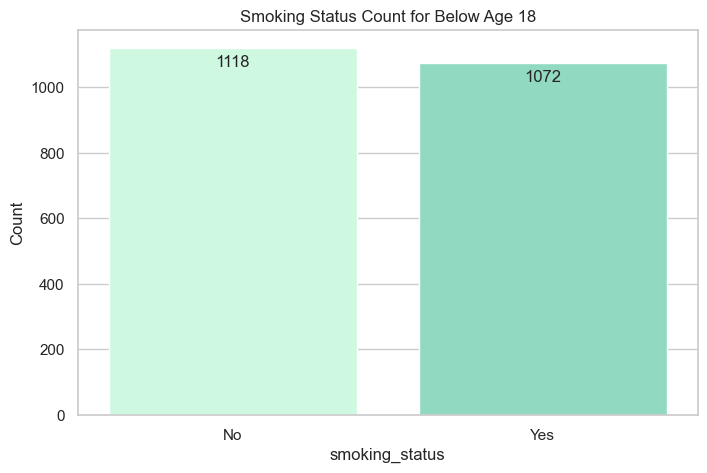

     sex  age  hypertension  heart_disease  ever_married work_type  \
65     1   17             0              1             0         1   
103    0   16             0              0             0         1   
141    1    8             1              1             0         1   
142    1   14             0              0             0         1   
154    1   13             0              1             0         1   

     Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
65                0              59.35  32.3               1       1  
103               0             116.44  23.8               1       1  
141               0             211.74  31.1               1       1  
142               0              97.92  26.9               1       1  
154               0             103.43  27.3               1       1  


In [34]:
# Create a count plot for 'smoking_status' status among individuals 18 below
plot_count(
    data_age_18_below, 
    column='smoking_status', 
    title='Smoking Status Count for Below Age 18', 
    labels=['No', 'Yes'], 
    colors=['#C8FFE0','#85E6C5']
)

# Filter the data
filtered_rows = data.loc[(data['age'] < 18) & (data['smoking_status'] == 1)].head(5)
print(filtered_rows)

Before:
Total smoker individuals below 18: 1072

After:
Total smoker individuals below 18: 0


C:\Users\tanky\AppData\Local\Temp\ipykernel_20300\1306253318.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




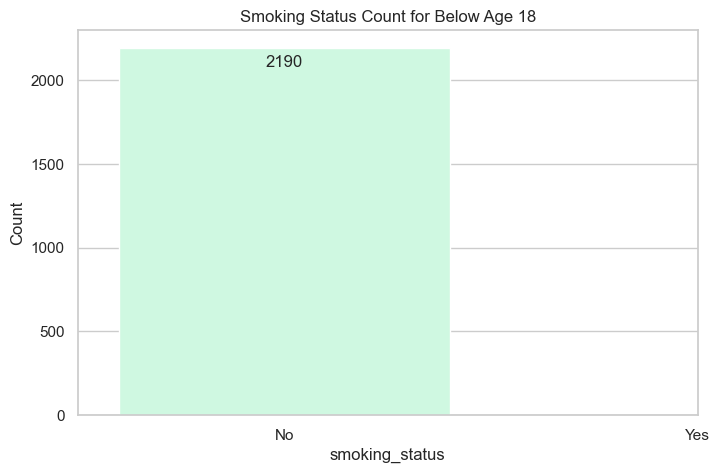

Empty DataFrame
Columns: [sex, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [35]:
# Filtering individuals 18 and below who are marked as smokers
smokers_under_18 = data[(data['age'] < 18) & (data['smoking_status'] == 1)].shape[0]

# Before
print("Before:")
print(f"Total smoker individuals below 18: {smokers_under_18}\n")

# Set 'smoking_status' to 0 (Non-smoker) where 'age' is less than 18
data.loc[data['age'] < 18, 'smoking_status'] = 0

# After 
workers_under_18 = data[(data['age'] < 18) & (data['smoking_status'] == 1)].shape[0]
print("After:")
print(f"Total smoker individuals below 18: {workers_under_18}")

# Justify the result using the chart
data_age_18_below = data[data['age'] < 18]
plot_count(
    data_age_18_below, 
    column='smoking_status', 
    title='Smoking Status Count for Below Age 18', 
    labels=['No', 'Yes'], 
    colors=['#C8FFE0']
)

# Filter the data based on the conditions
filtered_rows = data.loc[(data['age'] < 18) & (data['smoking_status'] == 1)].head(5)
print(filtered_rows)

##### Above 18 - work_type

C:\Users\tanky\AppData\Local\Temp\ipykernel_20300\1306253318.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




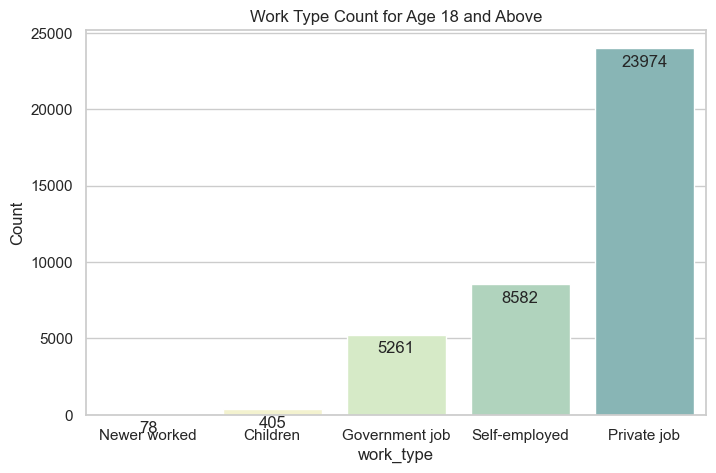

       sex  age  hypertension  heart_disease  ever_married work_type  \
20580    0   67             0              0             0         1   
20587    0   66             0              0             0         1   
20611    1   52             0              0             0         1   
20639    1   42             0              0             0         1   
20706    1   33             0              0             0         1   

       Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
20580               1              70.16  21.2               0       0  
20587               1              86.86  25.4               0       0  
20611               1             122.31  15.3               0       0  
20639               0             129.53  21.3               0       0  
20706               0             205.50  24.2               0       0  


In [36]:
# Before
data_age_18_above = data[data['age'] >= 18]

# Create a count plot for 'work_type' status among individuals 18 and above
plot_count(
    data_age_18_above, 
    column='work_type', 
    title='Work Type Count for Age 18 and Above', 
    labels=['Newer worked', 'Children', 'Government job', 'Self-employed', 'Private job'], 
    colors=['#FAEF9B','#F9F7C9','#D5F0C1','#AAD9BB','#80BCBD',]
)

# Filter the data 
filtered_rows = data.loc[(data['age'] >= 18) & (data['work_type'] == 1)].head(5)
print(filtered_rows)

Before:
Total individuals above 18 but categorized as children: 405

After:
Total individuals above 18 but categorized as children: 0



C:\Users\tanky\AppData\Local\Temp\ipykernel_20300\1306253318.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




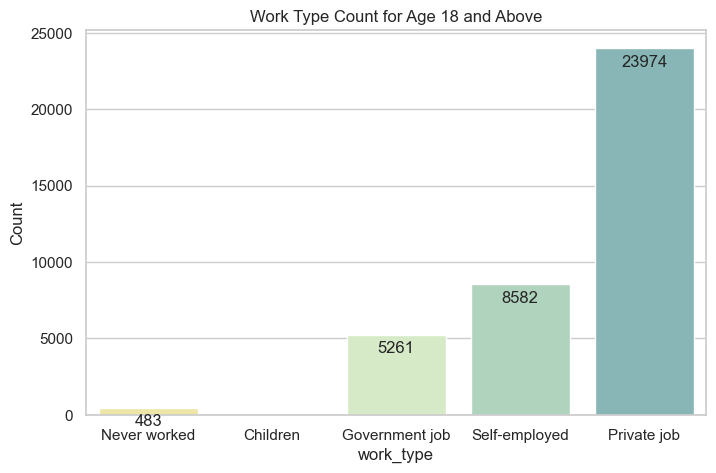

Empty DataFrame
Columns: [sex, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [37]:
# Filtering individuals 18 and above who are marked as children
worker_above_18 = data[(data['age'] >= 18) & (data['work_type'] == 1)].shape[0]

# Before
print("Before:")
print(f"Total individuals above 18 but categorized as children: {worker_above_18}\n")

# Set 'work_type' to 0 (Never worked) where 'age' is larger and equal 18 & categorized as children
data.loc[(data['age'] >= 18) & (data['work_type'] == 1), 'work_type'] = 0

data['work_type'] = pd.Categorical(data['work_type'], categories=[0, 1, 2, 3, 4])

# After
worker_above_18 = data[(data['age'] >= 18) & (data['work_type'] == 1)].shape[0]
print("After:")
print(f"Total individuals above 18 but categorized as children: {worker_above_18}\n")

data_age_18_above = data[data['age'] >= 18]
# Justify the result using the chart
plot_count(
    data[data['age'] >= 18], 
    column='work_type', 
    title='Work Type Count for Age 18 and Above', 
    labels=['Never worked', 'Children', 'Government job', 'Self-employed', 'Private job'], 
    colors=['#FAEF9B','#F9F7C9','#D5F0C1','#AAD9BB','#80BCBD',]
)

# Filter the data based on the conditions
filtered_rows = data.loc[(data['age'] >= 18) & (data['work_type'] == 1)].head(5)
print(filtered_rows)

#### Data Transformation

In [38]:
# Perform transformation
# Apply log transform to avg_glucose_level
data['avg_glucose_level'] = np.log1p(data['avg_glucose_level'])

# Apply log transform to bmi
data['bmi'] = np.log1p(data['bmi'])

In [39]:
data.describe()

,sex,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40490.000000,40490.000000,40490.000000,40490.000000,40490.000000,40490.000000,40490.000000,40490.000000,40490.000000,40490.000000
mean,0.554310,51.777303,0.213114,0.127859,0.774932,0.514868,4.714571,3.424655,0.462855,0.495925
std,0.497048,21.140108,0.409513,0.333937,0.417632,0.499785,0.428583,0.208152,0.498624,0.499990
min,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,4.027492,2.525729,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,0.000000,4.378897,3.292126,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,1.000000,4.594311,3.414443,0.000000,0.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,1.000000,5.126401,3.558201,1.000000,1.000000
max,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,5.608519,4.532599,1.000000,1.000000


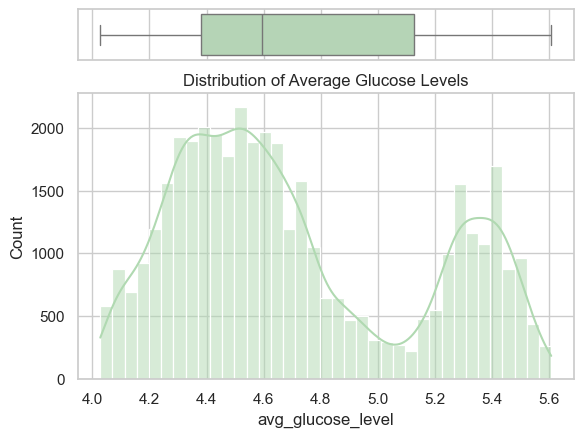

Median: 4.59
Q3 (75th percentile): 5.13
Q1 (25th percentile): 4.38
Interquartile Range (IQR): 0.75
Upper Whisker: 5.61
Lower Whisker: 4.03


In [40]:
# Verify the result
# Create histogram and boxplot to have an overview of the distribution for average glucose level
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
sns.boxplot(data["avg_glucose_level"], orient="h", ax=ax_box, color='#B0D9B1')
sns.histplot(data=data, x="avg_glucose_level", ax=ax_hist, color='#B0D9B1', kde=True)

ax_hist.set_title('Distribution of Average Glucose Levels')
ax_box.set(xlabel='')
plt.show()

calculate_stat(data, "avg_glucose_level")

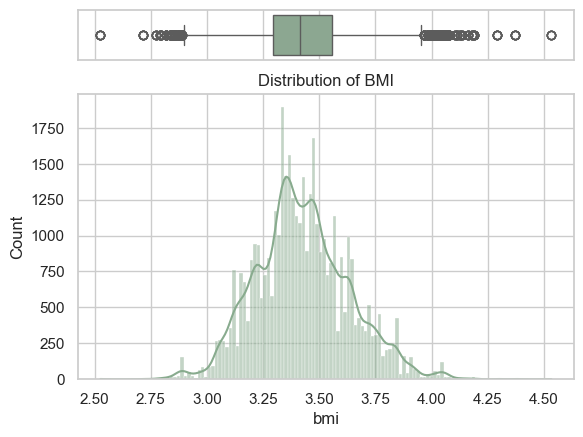

Median: 3.41
Q3 (75th percentile): 3.56
Q1 (25th percentile): 3.29
Interquartile Range (IQR): 0.27
Upper Whisker: 3.95
Lower Whisker: 2.90


In [41]:
# Craete histogram and boxplot to have an overview of the distribution for BMI
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
sns.boxplot(data["bmi"], orient="h", ax=ax_box, color='#88AB8E')
sns.histplot(data=data, x="bmi", ax=ax_hist, color='#88AB8E', kde=True)

ax_hist.set_title('Distribution of BMI')
ax_box.set(xlabel='')
plt.show()

calculate_stat(data, "bmi")

In [42]:
# Check the skewness of continuous data
data_skew = data[['age','avg_glucose_level','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['Skewness']
skew['Status'] = skew['Skewness'] > 0.6
skew

,Skewness,Status
age,-0.035230,False
avg_glucose_level,0.528242,False
bmi,0.275204,False


### Data Exploration

#### Age vs Stroke Count

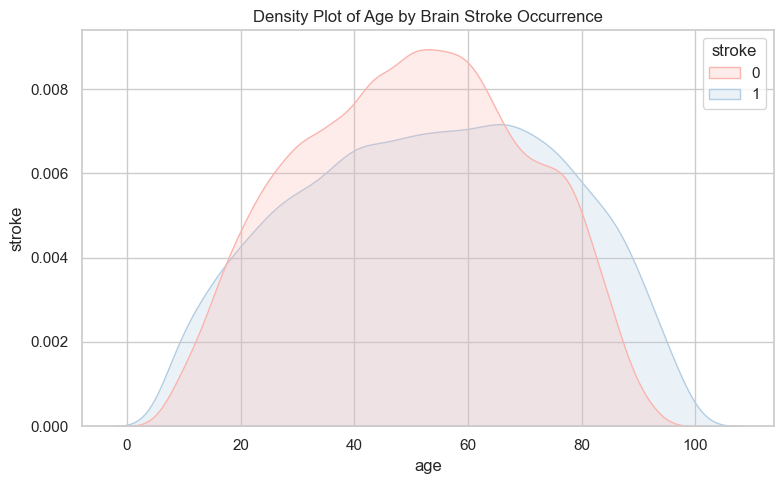

In [43]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='age', hue='stroke', fill=True, palette='Pastel1')

plt.title('Density Plot of Age by Brain Stroke Occurrence')
plt.xlabel('age')
plt.ylabel('stroke')

plt.tight_layout()
plt.show()

#### Categorical Variables Distribution by Stroke

C:\Users\tanky\AppData\Local\Temp\ipykernel_20300\405479272.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



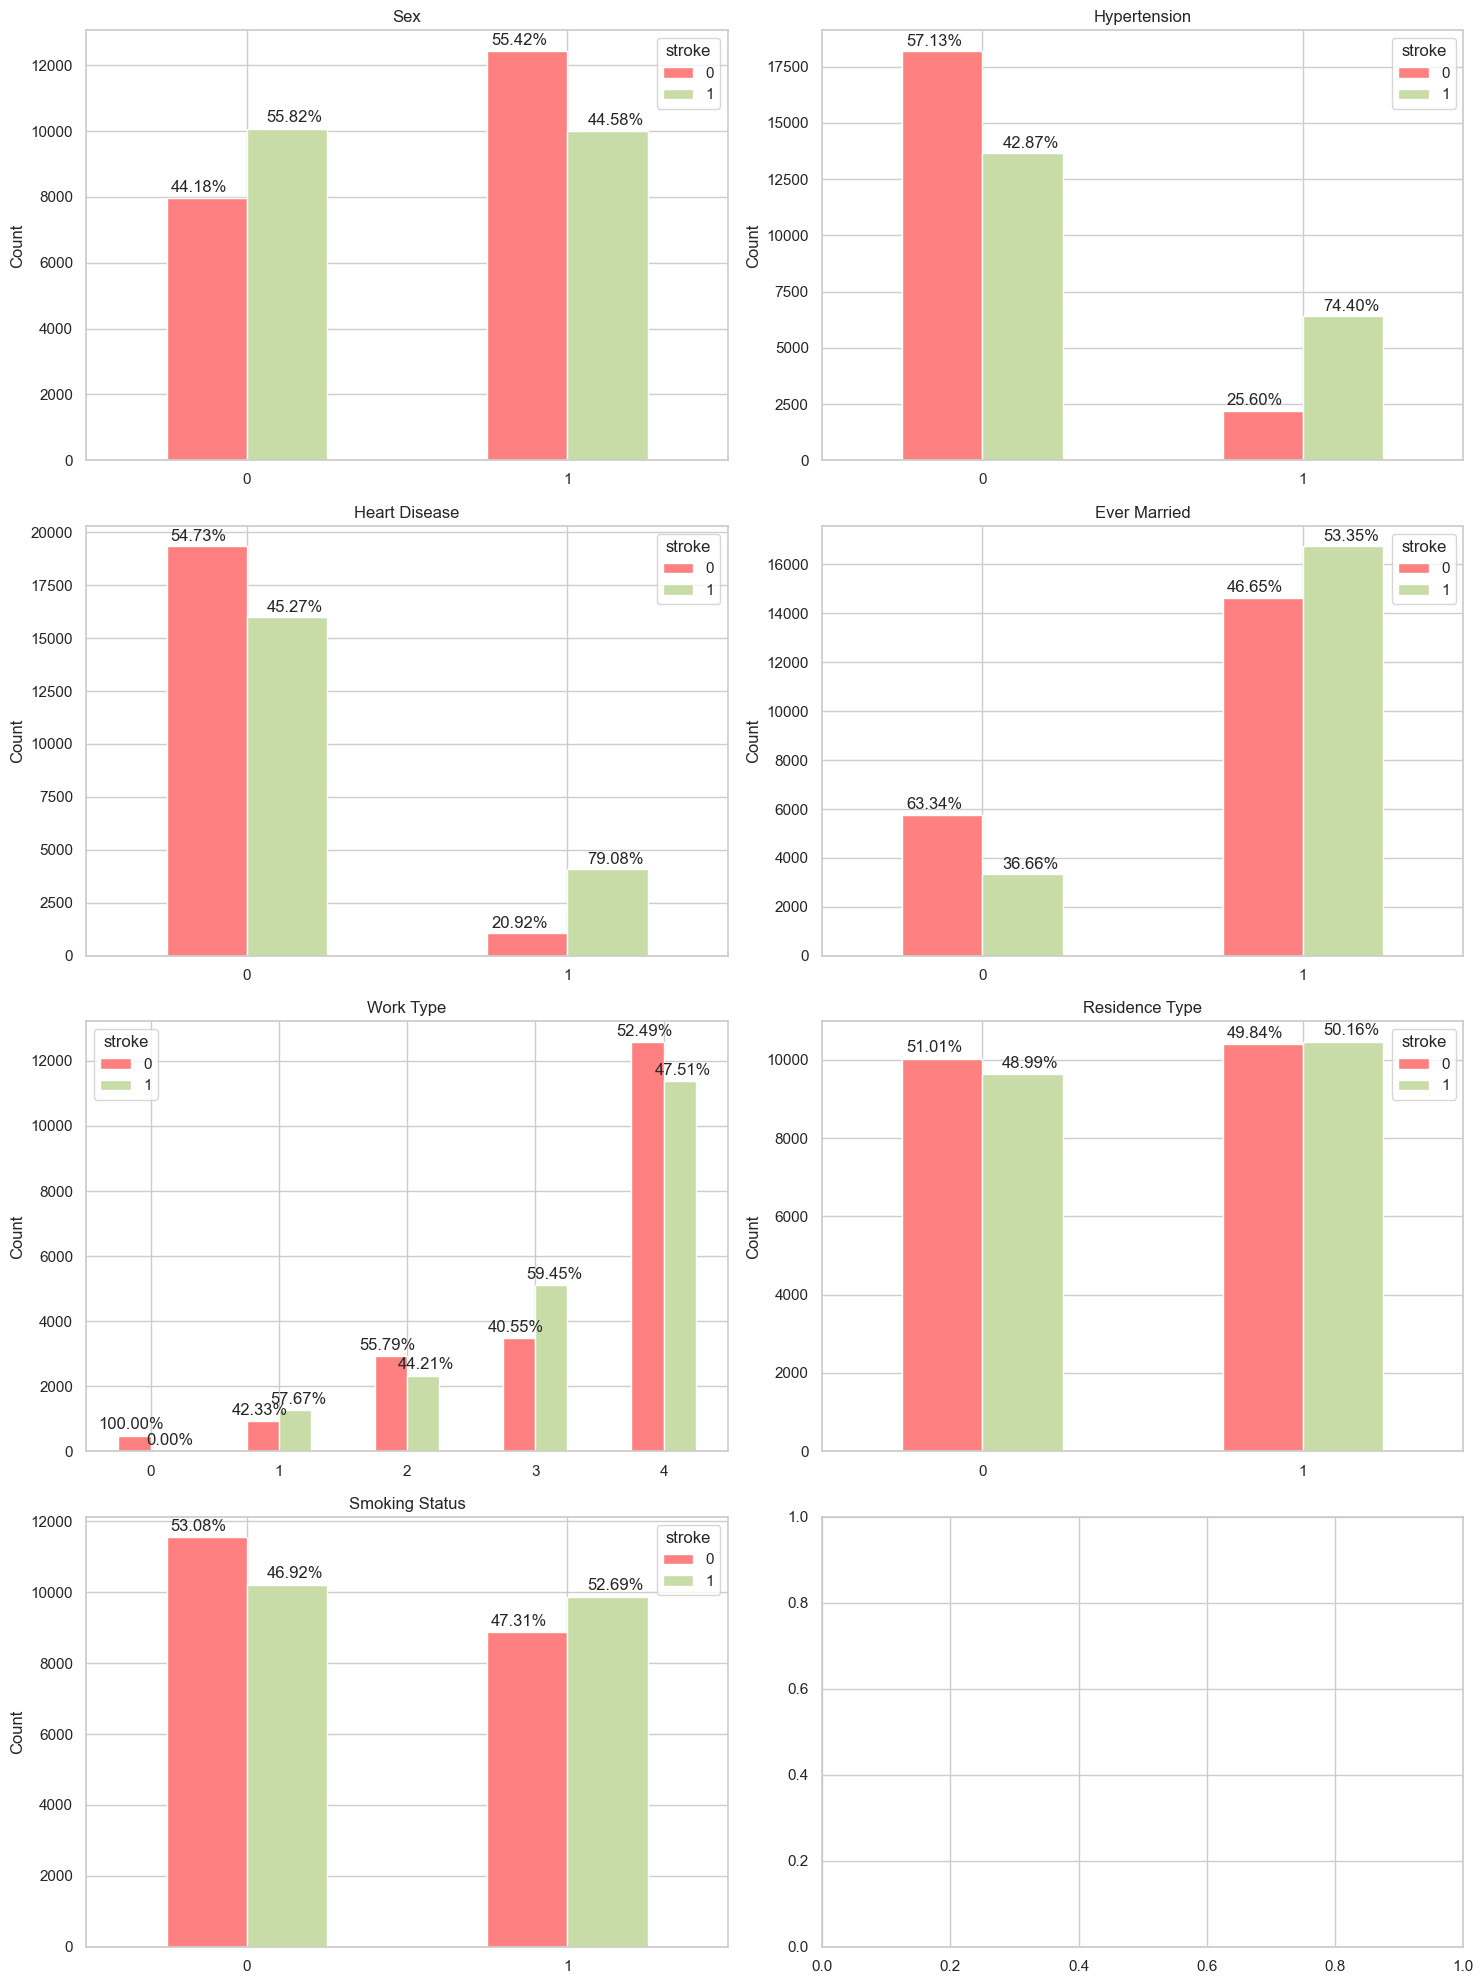

In [44]:
categories = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Create subplots for each category
n_rows = len(categories) // 2 + len(categories) % 2
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20)) 
axes = axes.flatten() 

for ax, category in zip(axes, categories):
    # Calculate counts
    count_data = data.groupby(category)['stroke'].value_counts().unstack()
    
    # Plot bar chart
    count_data.plot(kind='bar', stacked=False, ax=ax, color=['#FF8080', '#C7DCA7'])
    
    # Calculate and annotate percentages
    for i, (index_value, row) in enumerate(count_data.iterrows()):
        total = row.sum()
        for j, count in enumerate(row):
            percentage = f'{count / total:.2%}'
            x = i - 0.15 if j == 0 else i + 0.15  
            ax.text(x, count + 100, percentage, ha='center', va='bottom') 

    # Set labels and title
    ax.set_title(f'{category.replace("_", " ").title()}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

#### Continuous Variables Distribution by Stroke

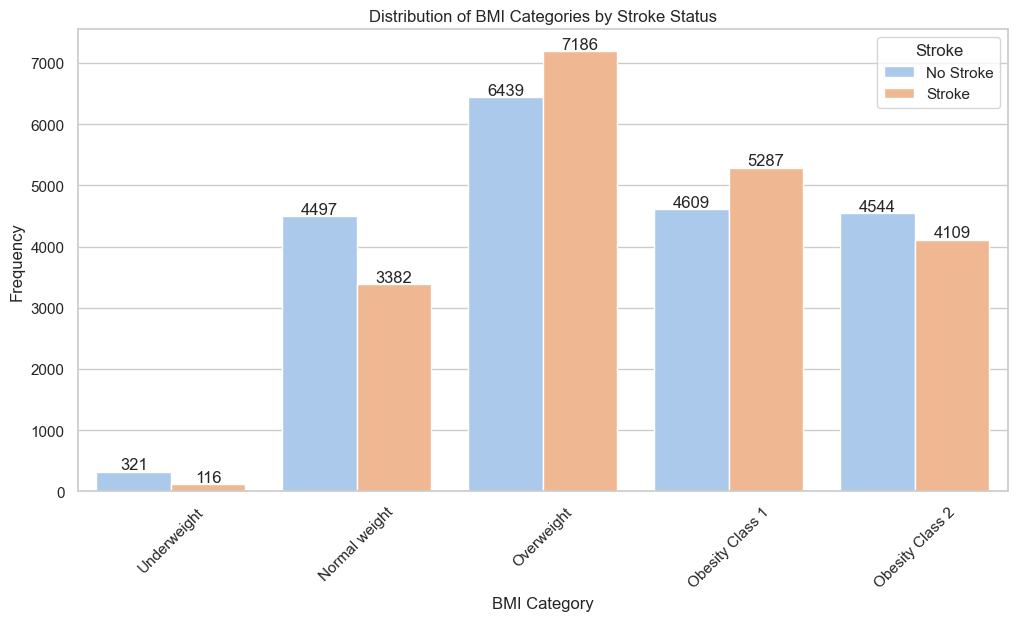

In [56]:
data2 = data.copy()

df = pd.DataFrame(data2)

df['inverse_bmi'] = np.expm1(df['bmi'])

# Categorizing inverse BMI into different categories
bins = [0, 18.5, 24.9, 29.9, 34.9, np.inf]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity Class 1', 'Obesity Class 2']
df['bmi_category'] = pd.cut(df['inverse_bmi'], bins=bins, labels=labels, right=False)

# Plotting the distribution of BMI categories, differentiated by stroke status
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='bmi_category', hue='stroke', palette='pastel')
plt.title('Distribution of BMI Categories by Stroke Status')
plt.xlabel('BMI Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Add this condition to skip bars with a height of 0
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

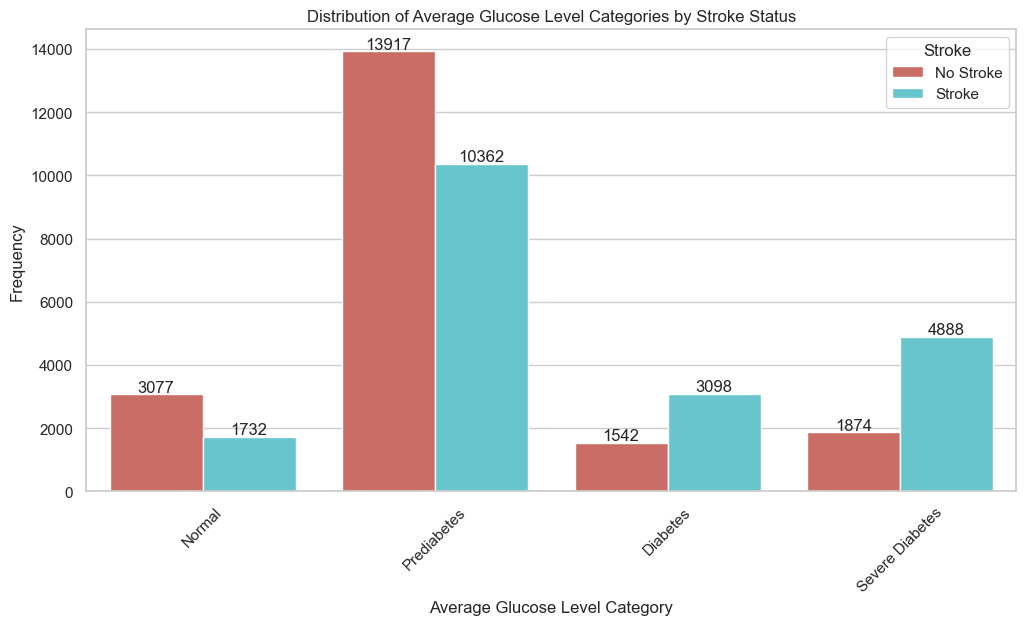

In [58]:
df['inverse_glucose'] = np.expm1(df['avg_glucose_level'])

# Categorizing average glucose levels into different categories
glucose_bins = [0, 70, 140, 200, np.inf]
glucose_labels = ['Normal', 'Prediabetes', 'Diabetes', 'Severe Diabetes']
df['glucose_category'] = pd.cut(df['inverse_glucose'], bins=glucose_bins, labels=glucose_labels, right=False)

# Plotting the distribution of average glucose level categories, differentiated by stroke status
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='glucose_category', hue='stroke', palette='hls')
plt.title('Distribution of Average Glucose Level Categories by Stroke Status')
plt.xlabel('Average Glucose Level Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Add this condition to skip bars with a height of 0
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

#### Correlation Between Continuous Variables

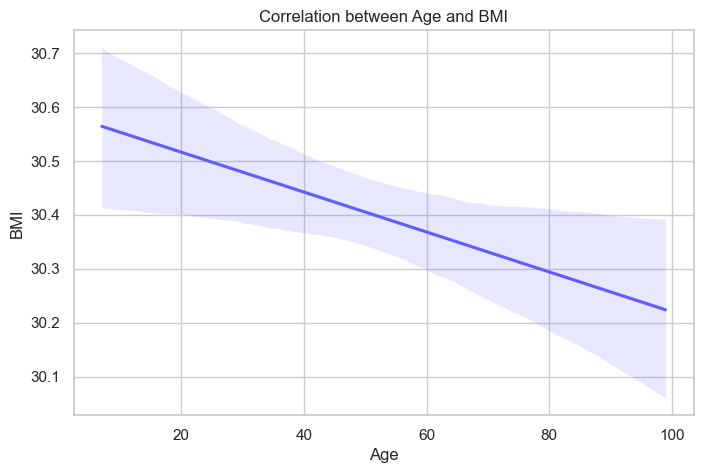

In [59]:
plt.figure(figsize=(8, 5))
sns.regplot(x='age', y='inverse_bmi', data=df, color='#615EFC', scatter=False)
plt.title('Correlation between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

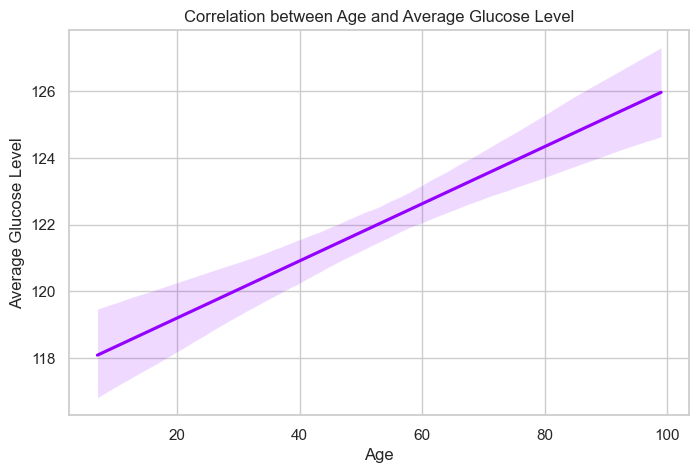

In [60]:
plt.figure(figsize=(8, 5))
sns.regplot(x='age', y='inverse_glucose', data=df, color='#9400FF', scatter=False)
plt.title('Correlation between Age and Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

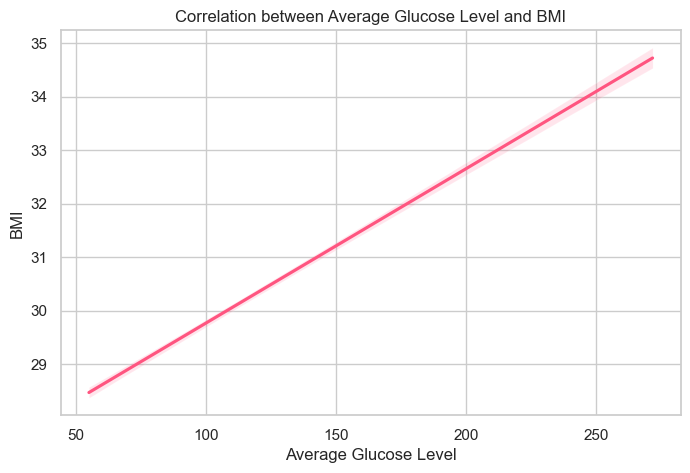

In [61]:
plt.figure(figsize=(8, 5))
sns.regplot(x='inverse_glucose', y='inverse_bmi', data=df, color='#FF5580', scatter=False)
plt.title('Correlation between Average Glucose Level and BMI')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.show()

#### Correlation Heatmap 

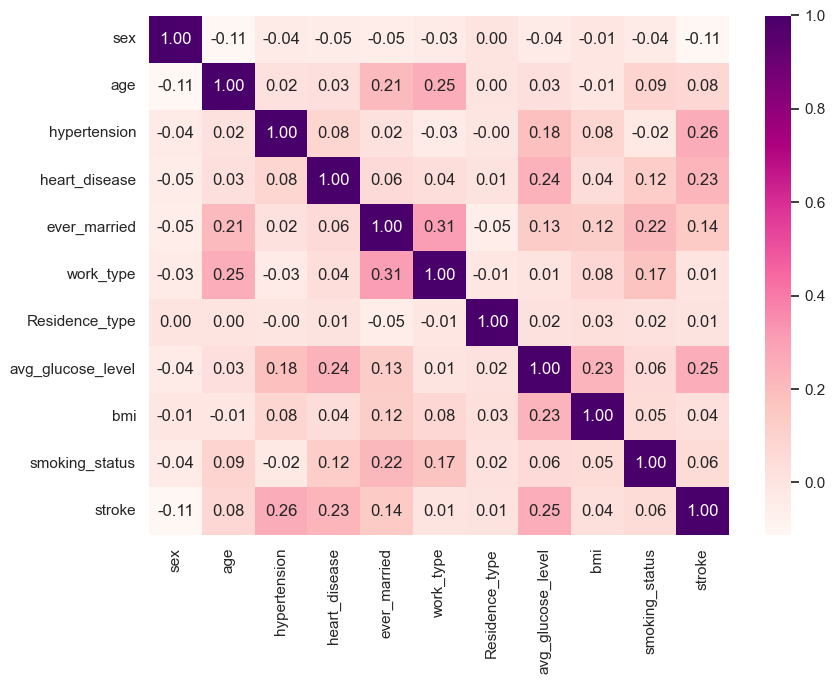

In [50]:
# Correlation heatmap - Find the correlation between features
corr = data.corr()
plt.figure(figsize=(9, 7))

sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdPu", cbar=True)

plt.tight_layout()
plt.show()

#### Feature Correlation with Stroke

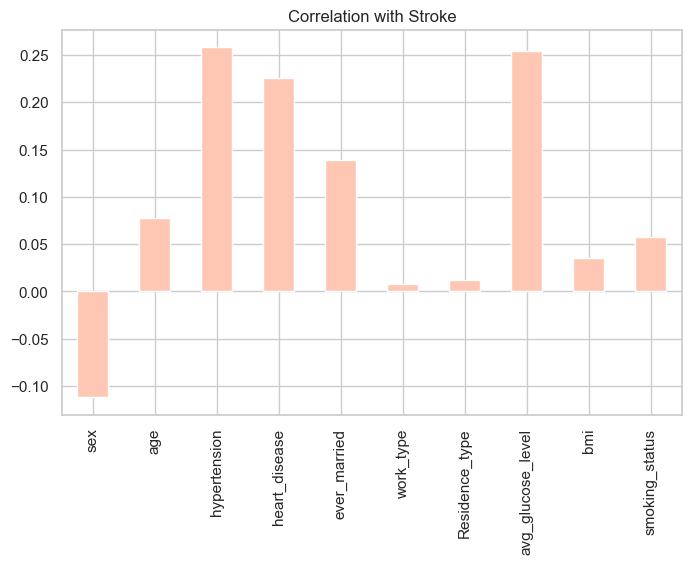

In [51]:
data.drop('stroke', axis=1).corrwith(data.stroke).plot(kind='bar', grid=True, figsize=(8, 5), 
          title="Correlation with Stroke",color='#FEC7B4');

### Drop Features

In [52]:
# Drop the work and resident type due to low correlation with stroke
data.drop(['work_type', 'Residence_type'], axis=1, inplace=True)
data

,sex,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,1,63,0,1,1,5.436731,3.627004,1,1
1,1,42,0,1,1,4.672081,3.511545,0,1
2,0,61,0,0,1,5.148831,3.566712,1,1
3,1,41,1,0,1,5.165471,3.218876,0,1
4,1,85,0,0,1,5.232231,3.401197,1,1
...,...,...,...,...,...,...,...,...,...
40925,1,38,0,0,0,4.803529,3.424263,1,0
40926,0,53,0,0,1,4.365135,3.732896,0,0
40927,1,32,0,0,1,5.450824,3.532226,0,0
40928,1,42,0,0,1,5.381647,3.569533,0,0


### Correlation Heatmap & Feature Correlation

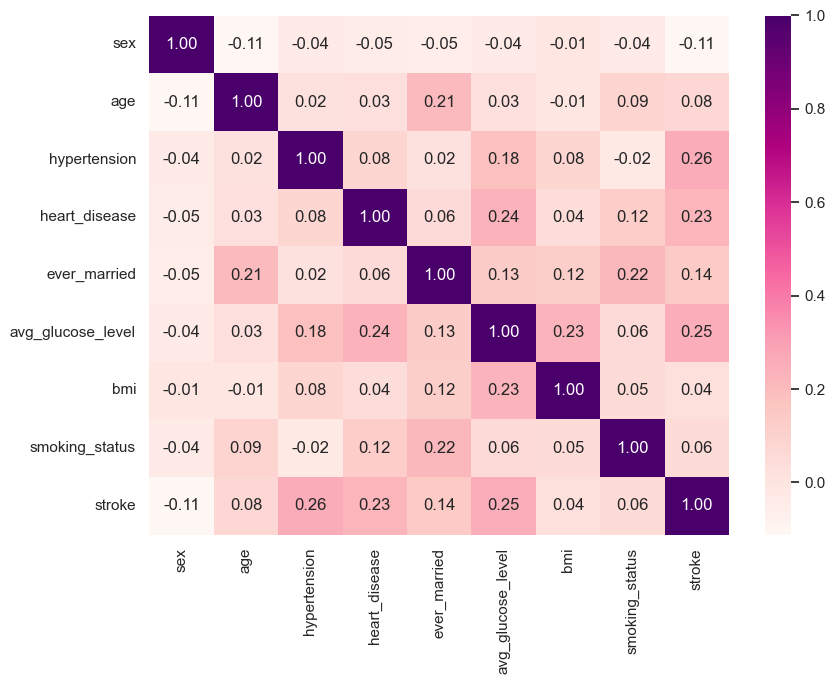

In [53]:
# Correlation heatmap - Find the correlation between features
corr = data.corr()
plt.figure(figsize=(9, 7))

sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdPu", cbar=True)

plt.tight_layout()
plt.show()

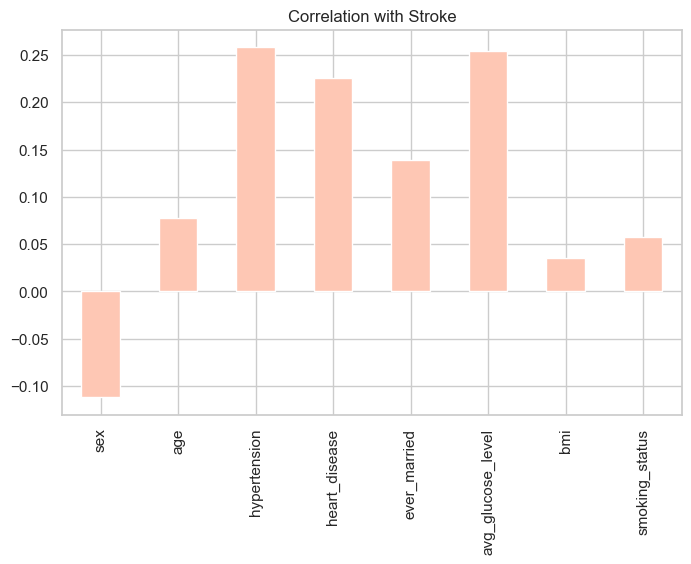

In [54]:
data.drop('stroke', axis=1).corrwith(data.stroke).plot(kind='bar', grid=True, figsize=(8, 5), 
          title="Correlation with Stroke",color='#FEC7B4');

### Export Processed DataFrame

In [55]:
# Export the preprocessed DataFrame to a CSV file
data.to_csv('preprocessed_data.csv', index=False)

print("Data exported")

Data exported
